<!-- <a href="https://media.suckhoecong.vn/Images/Uploaded/Share/2016/05/11/michelin_star.png">Image</a> -->

# Instruction:
### Overview of Michelin: (and the data)

### Objectives:
- What is the most Michelin rank existed?
- What is the highest/lowest price?
- Which country does it have most/lest Michelin restaurants?
- What is the most beloved cuisine style? (based on Michelin rank)
### Notes:

# First Setup

### Setup Library - Config - Import data

In [171]:
# Setup Library
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import re

from count_sum import *
from info_enhance import *
from API_Get import *

import folium

In [172]:
# Config
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="darkgrid")

In [173]:
# Import Data
df = pd.read_csv('michelin_my_maps.csv')

### Data first look

In [174]:
print('Data Overview:-----------------------------------------')
display(df.head(5))
print('Data Structure:-----------------------------------------')
display(infoOut(df,vunique=True))

Data Overview:-----------------------------------------


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.79,52.43,495361606056.00,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.00,53.54,494022867422.00,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.76,47.70,4980226690.00,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.39,49.54,49686679118.00,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.39,52.53,493024628760.00,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


Data Structure:-----------------------------------------


,Column,Non-Null Count,Dtype,Unique
0,Name,6502,object,Kamanza Nagashima;Oaxen Slip;Zortziko;Shikigoh...
1,Address,6502,object,"via Panfilo Castaldi 18, Milan, 20124, Italy;1..."
2,Location,6502,object,Sant Quirze del Vallès;Hunstanton;Magdeburg;Ca...
3,MinPrice,6501,object,"nan;1,219;75;28,000;1,680;1,250;29,900;87;2,70..."
4,MaxPrice,6501,object,"nan;75;28,000;346;1,680;1,250;1,798;29,900;87;..."
5,Currency,6501,object,nan;EUR;DKK;CNY;RSD;ISK;HKD;SGD;BRL;CHF;TWD;PL...
6,Cuisine,6502,object,"Modern Cuisine, Classic Cuisine;Contemporary, ..."
7,Longitude,6502,float64,-0.57423;1.7724975;2.3008612;2.8876408;4.90031...
8,Latitude,6502,float64,1.283175;7.8810304;7.9801073;8.5936703;8.27692...
9,PhoneNumber,6381,float64,nan;nan;nan;nan;nan;nan;nan;4947214340.0;nan;n...


### Null-data Solution & Reconfig:

In [175]:
# Null-data explore:
print('Percentage of null: ----------------------------------')
null_per = df.isnull().sum()*100/len(df)
null_per = null_per.to_frame()
null_per.columns = ['Percent']
null_per.index.names = ['Name']
null_per.reset_index(inplace=True)
display(null_per)

Percentage of null: ----------------------------------


,Name,Percent
0,Name,0.00
1,Address,0.00
2,Location,0.00
3,MinPrice,0.02
4,MaxPrice,0.02
5,Currency,0.02
6,Cuisine,0.00
7,Longitude,0.00
8,Latitude,0.00
9,PhoneNumber,1.86


In [176]:
# Drop Null-data and Reconfig format
df = df.dropna(subset=['MinPrice','MaxPrice','Currency']).reset_index().drop(columns='index')
df['MinPrice'] = df['MinPrice'].str.replace(',','')
df['MinPrice'] = df['MinPrice'].astype(str).astype('float64')
df['MaxPrice'] = df['MaxPrice'].str.replace(',','')
df['MaxPrice'] = df['MaxPrice'].astype(str).astype('float64')

### Null solved data

In [177]:
print('Overview: ===============================')
display(df.head(3))
print('Summary: ===============================')
df_summary = infoOut(df,vunique=True)
display(df_summary)

Overview: ===============================


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225.00,225.00,EUR,"Creative, Modern Cuisine",10.79,52.43,495361606056.00,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230.00,230.00,EUR,Creative,10.00,53.54,494022867422.00,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259.00,319.00,EUR,Creative,11.76,47.70,4980226690.00,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars


Summary: ===============================


,Column,Non-Null Count,Dtype,Unique
0,Name,6501,object,Kamanza Nagashima;Oaxen Slip;Zortziko;Shikigoh...
1,Address,6501,object,"via Panfilo Castaldi 18, Milan, 20124, Italy;1..."
2,Location,6501,object,Sant Quirze del Vallès;Hunstanton;Magdeburg;Ca...
3,MinPrice,6501,float64,2.0;3.0;4.0;5.0;6.0;7.0;8.0;10.0;11.0;12.0;13....
4,MaxPrice,6501,float64,2.0;4.0;5.0;6.0;7.0;8200.0;8.0;10.0;11.0;12.0;...
5,Currency,6501,object,EUR;DKK;CNY;RSD;ISK;HKD;SGD;BRL;CHF;TWD;PLN;US...
6,Cuisine,6501,object,"Modern Cuisine, Classic Cuisine;Contemporary, ..."
7,Longitude,6501,float64,-0.57423;1.7724975;2.3008612;2.8876408;4.90031...
8,Latitude,6501,float64,1.283175;7.8810304;7.9801073;8.5936703;8.27692...
9,PhoneNumber,6380,float64,nan;nan;nan;nan;nan;nan;nan;4947214340.0;nan;n...


### Get currency to exchange


In [178]:
# Dict to exchange
# Curr_ex_dict = dict()
# for index,value in enumerate(lst_plus):
#     dic_value = get_connection(CE = value)
#     Curr_ex_dict[value] = dic_value[value]
# display(Curr_ex_dict)

# Tempt exchange dict
Curr_ex_dict = {
       "EUR_USD": 1.0576,
       "GBP_USD": 1.2462,
       "MOP_USD": 0.1237,
       "HKD_USD": 0.1274,
       "JPY_USD": 0.0078,
       "KRW_USD": 0.0008,
       "CNY_USD": 0.1489,
       "USD_USD": 1,
       "SEK_USD": 0.1007,
       "NOK_USD": 0.1031,
       "DKK_USD": 0.1421,
       "SGD_USD": 0.7244,
       "TWD_USD": 0.0337,
       "CHF_USD": 1.0283,
       "THB_USD": 0.0290,
       "BRL_USD": 0.2031,
       "CZK_USD": 0.0428,
       "ISK_USD": 0.0076,
       "HRK_USD": 0.1403,
       "HUF_USD": 0.0028,
       "PLN_USD": 0.2275,
       "RSD_USD": 0.0090
}

# Process

### Create new data

In [179]:
# First data
db = df.iloc[:,:]
da = db['Address']

# New data-field: Nation
db['Nation'] = [re.findall(r", \w(?:[A-Za-z])+", da)[-1].replace(', ','') for da in da]

# New data-field: CtUSD (Currency to USD)
db['CtUSD'] = db['Currency']+'_USD'

# New data-field: MinPrice_USD & MaxPrice_USD
db['MinPrice_USD'] = [db['MinPrice'][i]*Curr_ex_dict.get(db['CtUSD'][i]) for i in range(len(db))]
db['MaxPrice_USD'] = [db['MaxPrice'][i]*Curr_ex_dict.get(db['CtUSD'][i]) for i in range(len(db))]

# Split Cuisine-field
db['Cuisine'] = [db['Cuisine'][i].split(', ') for i in range(len(db))]

# Filter&Sort data
cols = ['Name','Location', 'Nation', 'MinPrice_USD', 'MaxPrice_USD','Cuisine', 'Longitude', 'Latitude', 'Award']
db = db.loc[:,cols]

### Summary based on Nation

In [180]:
# Based on Nations (no ranking)
by_Nation = db\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

# Based on Nations (with ranking)
by_Nation_rank_3 = db[db['Award'] == '3 MICHELIN Stars']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_3.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_2 = db[db['Award'] == '2 MICHELIN Stars']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_2.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_1 = db[db['Award'] == '1 MICHELIN Star']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_1.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_0 = db[db['Award'] == 'Bib Gourmand']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_0.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

### Summary based on Award

In [181]:
cols = ['Award','MinPrice_USD','MaxPrice_USD']

Award_count = db\
            .groupby('Award')\
            .agg({"Name":'count'})\
            .reset_index()
Award_count.columns = ['Award','count']            
          
Award_db = db[cols]
Award_db = pd.melt(Award_db, id_vars =['Award'], value_vars =['MinPrice_USD','MaxPrice_USD'])


### Summary based on Price

In [182]:
cols = ['Name','Award','MinPrice_USD','MaxPrice_USD','Longitude','Latitude']

Price_db = db[cols]
Top_Min_Price_db = Price_db.sort_values('MinPrice_USD',ascending=True).head(10)
Top_Max_Price_db = Price_db.sort_values('MaxPrice_USD',ascending=False).head(10)

# Conclusion:

### How Michelin stars (without ranking) distributes in nations

In [183]:
# Make an empty map
m_Nations = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
data= by_Nation.iloc[:,:]

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['Lat'], data.iloc[i]['Long']],
      popup=data.iloc[i]['Nations'],
      radius=float(data.iloc[i]['Count'])*200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m_Nations)

# Show the map again
m_Nations

### How Michelin stars (with ranking) distributes in nations

In [184]:
# Make an empty map
m_Nations = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
data_3= by_Nation_rank_3.iloc[:,:]
data_2= by_Nation_rank_2.iloc[:,:]
data_1= by_Nation_rank_1.iloc[:,:]
data_0= by_Nation_rank_0.iloc[:,:]

for i in range(0,len(data_3)):
   folium.Circle(
      location=[data_3.iloc[i]['Lat'], data_3.iloc[i]['Long']],
      popup=data_3.iloc[i]['Nations'],
      radius=float(data_3.iloc[i]['Count'])*400,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m_Nations)

for i in range(0,len(data_2)):
   folium.Circle(
      location=[data_2.iloc[i]['Lat'], data_2.iloc[i]['Long']],
      popup=data_2.iloc[i]['Nations'],
      radius=float(data_2.iloc[i]['Count'])*400,
      color='azure',
      fill=True,
      fill_color='azure'
   ).add_to(m_Nations)

for i in range(0,len(data_1)):
   folium.Circle(
      location=[data_1.iloc[i]['Lat'], data_1.iloc[i]['Long']],
      popup=data_1.iloc[i]['Nations'],
      radius=float(data_1.iloc[i]['Count'])*400,
      color='burlywood',
      fill=True,
      fill_color='burlywood'
   ).add_to(m_Nations)

for i in range(0,len(data_0)):
   folium.Circle(
      location=[data_0.iloc[i]['Lat'], data_0.iloc[i]['Long']],
      popup=data_0.iloc[i]['Nations'],
      radius=float(data_0.iloc[i]['Count'])*400,
      color='gray',
      fill=True,
      fill_color='gray'
   ).add_to(m_Nations)

# Show the map again
m_Nations

### What is the most Michelin rank existed?

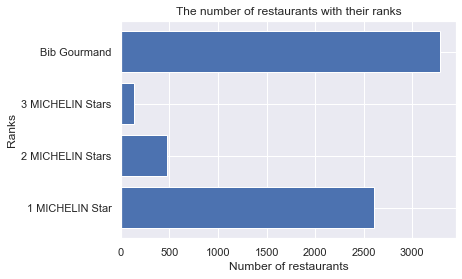

In [185]:
#Plot horizontal bar to display the popular of each ranks.
plt.barh(y=Award_count['Award'], width=Award_count['count'])

plt.xlabel('Number of restaurants')
plt.ylabel('Ranks')
plt.title('The number of restaurants with their ranks');

### What is the highest/lowest price?

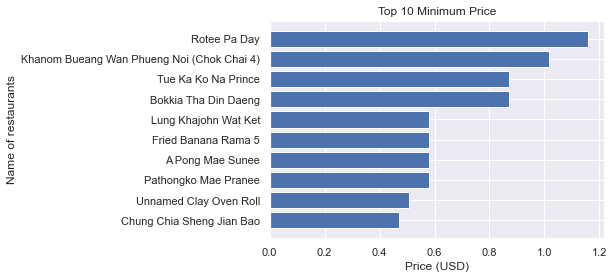

In [186]:
#Plot horizontal bar to display top Min Price
plt.barh(y=Top_Min_Price_db['Name'], width=Top_Min_Price_db['MinPrice_USD'])
plt.xlabel('Price (USD)')
plt.ylabel('Name of restaurants')
plt.title('Top 10 Minimum Price')
plt.show()



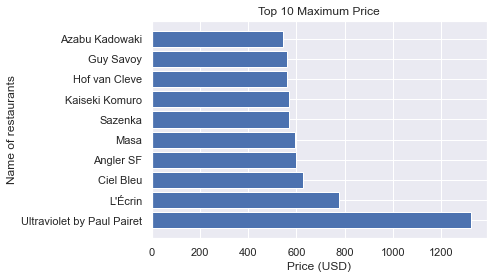

In [187]:
#Plot horizontal bar to display top Max Price
plt.barh(y=Top_Max_Price_db['Name'], width=Top_Max_Price_db['MaxPrice_USD'])
plt.xlabel('Price (USD)')
plt.ylabel('Name of restaurants')
plt.title('Top 10 Maximum Price')
plt.show()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

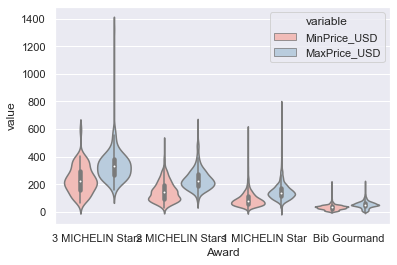

In [190]:
# Plot violinplot to distinguish 4 ranks prices
fig,ax = plt.subplots(figsize=(10,10))
sns.violinplot(x = 'Award', y = 'value',hue = 'variable',data = Award_db, palette="Pastel1")
plt.show()